In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import seaborn as sns

In [ ]:
import google.colab.drive as drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset_GWaves/trainingset.csv')
df

In [ ]:
all = ['event_time', 'peak_time', 'peak_time_ns', 'start_time', 'start_time_ns', 'amplitude', 'peak_frequency', 'label', 'sample_type']
df = df[all]
df

In [ ]:
df.describe()

In [ ]:
df.sort_values(by='event_time', inplace=True)

In [ ]:
df.dropna()

In [ ]:
plt.figure(figsize=(15,5))
plt.scatter(df['event_time'], df['amplitude'], s = 1)

1) a) Uma função que calcule um vetor com os valores da máxima amplitude, em cada tempo, dado o espectrograma;

b) Uma função que calcule um vetor com os valores de frequência correspondentes à máxima amplitude em cada tempo (conforme item (a) acima), dado o espectrograma.

In [9]:
def amplitude_frequencia(df, coluna_tempo, coluna_amplitude, coluna_frequencia, coluna_label):
    df_agrupado = df.groupby(coluna_tempo).apply(lambda x: x.loc[x[coluna_amplitude].idxmax()])[[coluna_tempo, coluna_amplitude, coluna_frequencia]]
    df_agrupado.columns = ['tempo', 'amplitude', 'frequencia']
    df_agrupado['label'] = df.groupby(coluna_tempo)[coluna_label].first().values
    amplitude = df_agrupado['amplitude'].values
    frequencia = df_agrupado['frequencia'].values
    return amplitude, frequencia

In [10]:
vetor_amp_freq = amplitude_frequencia(df, 'event_time', 'amplitude', 'peak_frequency', 'label')
vetor_amp_freq

(array([4.62454991e-21, 1.67398001e-21, 1.95014999e-21, ...,
        2.93352001e-22, 4.41961985e-22, 3.26010009e-22]),
 array([ 512.60766602,  183.49487305,   41.25313187, ..., 1096.14855957,
        1096.14855957, 1085.83007812]))

2)  Construa um classificador capaz de identificar o tipo de glitch tendo como entrada os vetores obtidos com as funções descritas acima.

In [11]:
amplitude, frequencia = amplitude_frequencia(df, 'event_time', 'amplitude', 'peak_frequency', 'label')
dados = pd.DataFrame({'amplitude': amplitude, 'frequencia': frequencia})
dados['label'] = df['label']
dados['sample_type'] = df['sample_type']

In [12]:
dados_treinamento = dados[dados['sample_type'] == 'train']
dados_teste = dados[dados['sample_type'] == 'test']
dados_validacao = dados[dados['sample_type'] == 'validation']

In [ ]:
dados_treinamento

In [14]:
# divisão dados de treino

dados_treinamento_x = dados_treinamento.iloc[:, :2]
treino_X = dados_treinamento_x
treino_X = dados_treinamento_x.values

dados_treinamento_y = dados_treinamento.iloc[:, 2]
treino_y = dados_treinamento_y
treino_y = dados_treinamento_y.values

In [15]:
# divisão dados de teste

dados_teste_x = dados_teste.iloc[:, :2]
teste_X = dados_teste_x
teste_X = dados_teste_x.values

dados_teste_y = dados_teste.iloc[:, 2]
teste_y = dados_teste_y
teste_y = dados_teste_y.values

In [84]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_treino_numerico = encoder.fit_transform(treino_y)
y_teste_numerico = encoder.transform(teste_y)

treino_y = y_treino_numerico
teste_y = y_teste_numerico

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
model = RandomForestClassifier(n_estimators=500, max_depth=8, random_state=1)
model.fit(treino_X, treino_y)
y_pred = model.predict(teste_X)

3) Avalie seu classificador usando as métricas que julgar convenientes.

In [101]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, treino_X, treino_y, cv=10)

array([0.20214669, 0.31663685, 0.30232558, 0.25402504, 0.2254025 ,
       0.23434705, 0.23255814, 0.22043011, 0.22759857, 0.15770609])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, teste_y))

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(teste_y, y_pred)

0.2748091603053435

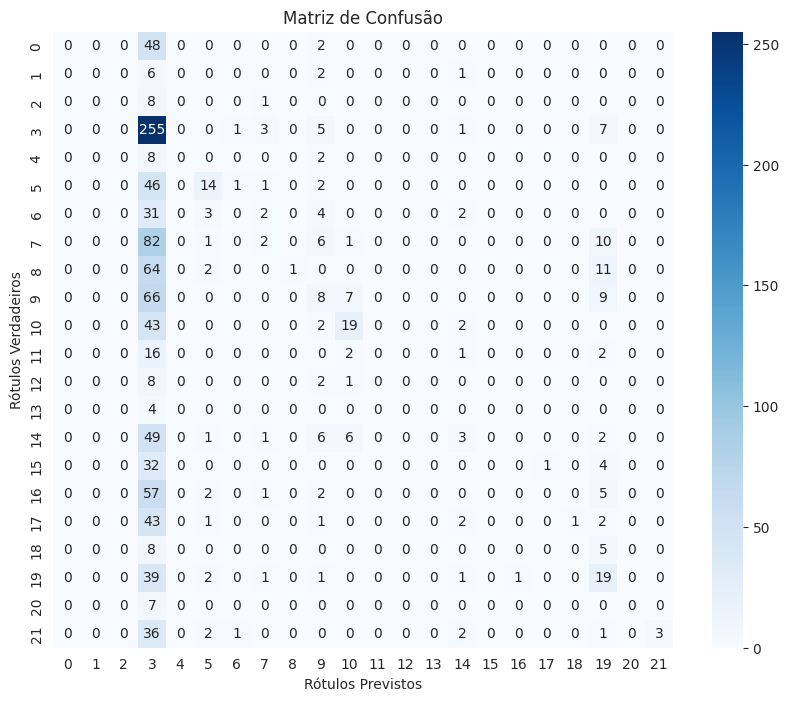

In [100]:
matriz_confusao = confusion_matrix(teste_y, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()
